In [23]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split as tts,RepeatedKFold,cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings 
warnings.filterwarnings('ignore')
data=pd.read_excel(r'C:/Users/NEHA/aqidata16-23.xlsx',index_col='Date'   ,parse_dates=True)
print(data.shape)
data.head()

(2549, 9)


,PM2.5,PM10,SO2,Ozone,NH3,CO,NO2,NO,AQI
Date,,,,,,,,,
2016-05-01,36.76,79.31,10.16,36.24,26.04,0.75,75.41,18.60,79
2016-05-02,42.66,88.87,9.92,30.01,31.50,0.97,95.18,22.07,89
2016-05-03,43.42,78.09,15.88,42.40,34.09,0.82,79.26,15.54,78
2016-05-04,26.85,56.65,21.58,48.88,22.03,0.46,41.71,3.74,57
2016-05-05,21.86,37.99,15.56,49.69,20.98,0.41,39.52,3.14,50


In [24]:
data.tail()

,PM2.5,PM10,SO2,Ozone,NH3,CO,NO2,NO,AQI
Date,,,,,,,,,
2023-05-08,93.68,55.02,12.10,35.67,27.89,0.84,46.92,6.96,94
2023-05-09,111.92,56.53,14.99,34.01,29.63,0.94,50.73,8.40,112
2023-05-10,130.77,67.48,24.49,35.01,25.04,1.25,65.07,17.66,131
2023-05-11,114.74,53.68,22.69,44.05,28.18,1.22,68.22,21.90,115
2023-05-12,159.40,75.26,12.10,2.39,23.58,1.66,119.90,37.06,159


In [25]:
data.isnull().sum()

PM2.5    0
PM10     0
SO2      0
Ozone    0
NH3      0
CO       0
NO2      0
NO       0
AQI      0
dtype: int64

In [26]:
data.duplicated().sum()

1

In [27]:
data.drop_duplicates(inplace=True)

In [28]:
data.describe()

,PM2.5,PM10,SO2,Ozone,NH3,CO,NO2,NO,AQI
count,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000
mean,46.686672,79.000514,9.603564,44.743414,25.459608,1.045169,33.424592,15.409819,88.764129
std,37.589676,39.539702,9.259437,29.692116,29.081805,0.621649,21.573007,19.247217,36.914407
min,1.100000,9.230000,0.030000,0.320000,0.280000,0.000000,0.040000,0.010000,18.000000
25%,22.247500,48.352500,2.530000,20.540000,6.907500,0.580000,19.270000,5.437500,62.000000
50%,37.715000,72.535000,6.470000,42.605000,17.135000,0.880000,27.555000,8.900000,84.000000
75%,59.925000,102.240000,14.830000,58.422500,30.510000,1.420000,42.442500,18.832500,112.000000
max,999.990000,274.790000,73.180000,180.360000,408.250000,5.450000,230.720000,251.570000,383.000000


Heatmap

In [29]:
data1=data.copy()

<Axes: >

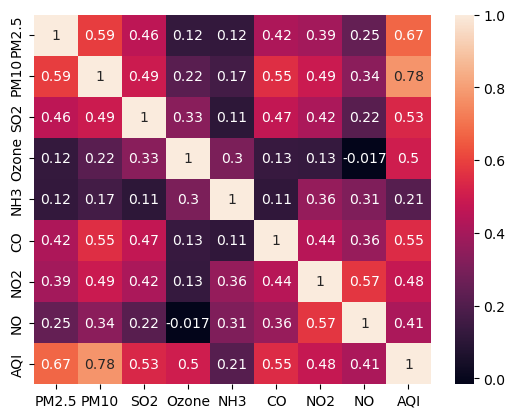

In [30]:
sns.heatmap(data1.corr(),annot=True)

In [46]:
X  = data1.drop(['AQI'] ,axis=1)  # independed variable
Y = data1['AQI']               # dependent variable

Data Spliting

In [47]:
x_train,x_test,y_train,y_test = tts(ind,dep,test_size=0.2,random_state=1)

print(x_test.shape)
print(x_train.shape)

(510, 8)
(2038, 8)


Multiple Linear Regressioon

In [48]:
#Multiple linear regression
from sklearn.linear_model import LinearRegression

# model object
model1 = LinearRegression()

# Fit the model
model1.fit(x_train, y_train)

LinearRegression()

In [57]:
# make predictions and check the error
y_pred = model1.predict(x_test)

# Metrics
from sklearn.metrics import mean_squared_error
mse_1 = mean_squared_error(y_test, y_pred)
mae_1 = mean_absolute_error(y_pred,y_test)
rmse_1 = np.sqrt(mse_1)
r_squared = r2_score(y_test,y_pred)
n = len(dep)
k = ind.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)


In [59]:
model1.intercept_
model1.coef_

array([ 0.38101737,  0.3699256 , -0.10499757,  0.50278118, -0.10819877,
        3.96566538, -0.04413801,  0.41861208])

In [61]:
print('PERFORMANCE')
print("The mean squared error is:" , mse_1)
print("The mean absolute error is:", mae_1)
print("The root mean squared error is:", rmse_1)
print("R-squared (R²):", r_squared)
print("Adjusted R-squared (adjusted R²):", adjusted_r_squared)

PERFORMANCE
The mean squared error is: 305.2415894900936
The mean absolute error is: 10.533425275430387
The root mean squared error is: 17.47116451442472
R-squared (R²): 0.774903384546487
Adjusted R-squared (adjusted R²): 0.7741941395982286


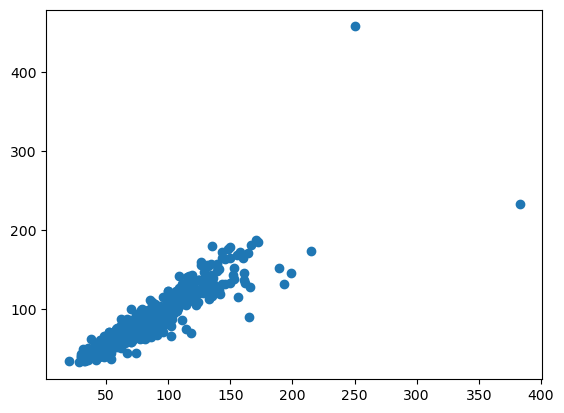

In [62]:
plt.scatter(y_test,y_pred)

In [64]:
predicted_multiple_dataframe = pd.concat([x_test, y_test], axis=1)
predicted_multiple_dataframe['predicted_AQI'] = y_pred

<Axes: xlabel='Date'>

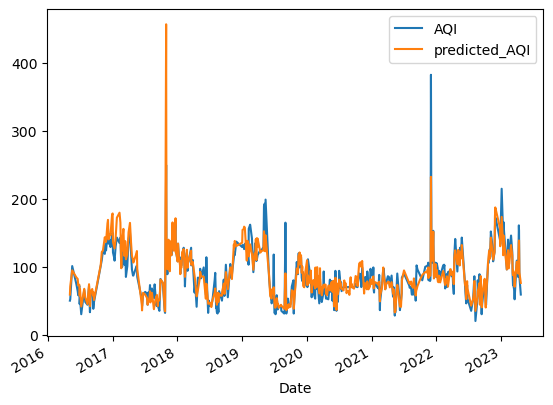

In [66]:
predicted_multiple_dataframe['AQI'].plot(legend=True)
predicted_multiple_dataframe['predicted_AQI'].plot(legend=True)

Lasso Regression

In [68]:
from sklearn.linear_model import Lasso
model2 = Lasso(alpha=0.1)
model2.fit(x_train, y_train)

Lasso(alpha=0.1)

In [88]:
pred = model2.predict(x_test)
print('Mean sqaure error:{}'.format(
    mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {}'.format(
     mean_absolute_error((y_test), (pred))))
print('Root mean square error: {}'.format(
    np.sqrt(mean_squared_error((y_test),(pred)))))
print('R-squared: {}'.format(
    r2_score((y_test),(pred))))
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
print("Adjusted R-squared (adjusted R²):", adjusted_r_squared)

Mean sqaure error:305.2415894900936
Mean absolute error: 10.545008381781152
Root mean square error: 17.4899075690472
R-squared: 0.7744201584599122
Adjusted R-squared (adjusted R²): 0.7741941395982286


In [89]:
model2.intercept_

14.42130472933431

In [90]:
model2.coef_

array([ 0.38141515,  0.37172986, -0.09701403,  0.50234289, -0.1083422 ,
        3.55158169, -0.04254097,  0.42008301])

In [92]:
predicted_lasso_dataframe = pd.concat([x_test, y_test], axis=1)
predicted_lasso_dataframe['predicted_AQILASSO'] = pred

<Axes: xlabel='Date'>

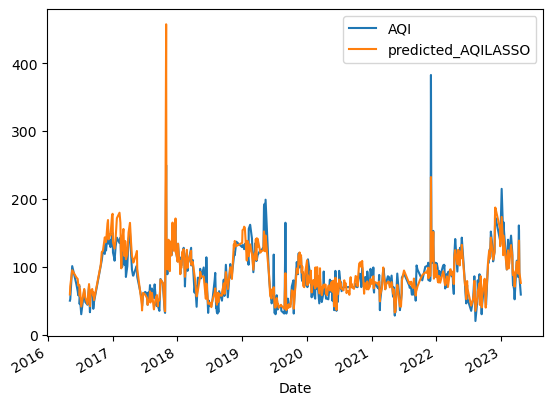

In [93]:
predicted_lasso_dataframe['AQI'].plot(legend=True)
predicted_lasso_dataframe['predicted_AQILASSO'].plot(legend=True)

Ridge regression

In [95]:
from sklearn.linear_model import Ridge

model3 = Ridge(alpha = 1)
model3.fit(x_train, y_train)

Ridge(alpha=1)

In [97]:
y_pred3 = model3.predict(x_test)

print('Mean sqaure error:{}'.format(
    mean_squared_error(y_test, y_pred3)))
print('Mean absolute error: {}'.format(
     mean_absolute_error((y_test), (y_pred3))))
print('Root mean square error: {}'.format(
    np.sqrt(mean_squared_error((y_test),(y_pred3)))))
print('R-squared: {}'.format(
    r2_score((y_test),(y_pred3))))
adjusted_r_squared3 = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
print("Adjusted R-squared (adjusted R²):", adjusted_r_squared3)

Mean sqaure error:305.25710648509306
Mean absolute error: 10.53367921870974
Root mean square error: 17.471608583215602
R-squared: 0.7748919417314295
Adjusted R-squared (adjusted R²): 0.7741941395982286


In [98]:
model3.intercept_

14.28066696457799

In [99]:
model3.coef_

array([ 0.38103143,  0.3699628 , -0.10488539,  0.50277955, -0.10820618,
        3.95766191, -0.04411515,  0.41865187])

In [104]:
predicted_ridge_dataframe = pd.concat([x_test, y_test], axis=1)
predicted_ridge_dataframe['predicted_AQIRIDGE'] = y_pred3

<Axes: xlabel='Date'>

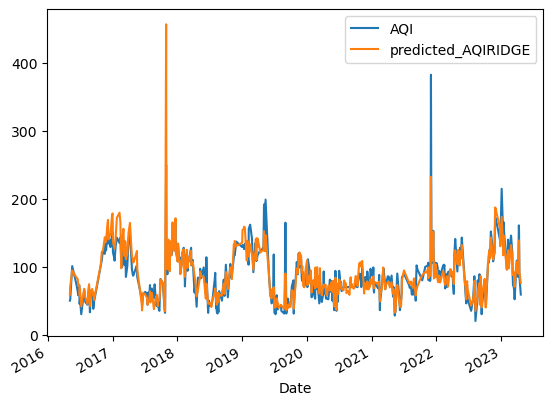

In [105]:
predicted_ridge_dataframe['AQI'].plot(legend=True)
predicted_ridge_dataframe['predicted_AQIRIDGE'].plot(legend=True)

In [106]:
predicted_lasso_dataframe 

,PM2.5,PM10,SO2,Ozone,NH3,CO,NO2,NO,AQI,predicted_AQILASSO
Date,,,,,,,,,,
2016-07-31,12.62,28.83,0.70,21.13,26.31,0.59,29.15,38.20,48,54.550383
2016-08-26,12.23,22.96,2.68,25.35,17.77,0.66,14.70,4.80,33,41.905173
2019-12-08,51.80,89.07,10.98,32.12,20.44,0.87,41.74,25.86,89,92.321676
2022-08-02,26.93,76.96,5.10,17.47,14.05,0.40,12.96,3.90,77,62.567721
2018-02-19,66.70,117.96,16.42,44.71,15.10,1.15,40.31,11.20,112,110.016185
...,...,...,...,...,...,...,...,...,...,...
2019-05-14,43.20,64.30,6.40,167.40,35.40,1.30,0.60,16.80,199,146.085591
2017-05-20,51.76,85.05,7.68,64.27,32.84,0.56,16.82,3.57,85,96.534572
2018-01-17,57.51,106.77,13.99,37.67,21.26,1.28,34.99,14.14,105,100.306252


In [139]:
AQImonth= data1['AQI'].resample('M').mean()


In [140]:
AQImonth.head()

Date
2016-05-31    80.064516
2016-06-30    80.814815
2016-07-31    46.000000
2016-08-31    51.000000
2016-09-30    52.233333
Freq: M, Name: AQI, dtype: float64

In [244]:
df = pd.DataFrame({'Date': AQImonth.index, 'AQI': AQImonth.values})

df.head()

,Date,AQI
0,2016-05-31,80.064516
1,2016-06-30,80.814815
2,2016-07-31,46.000000
3,2016-08-31,51.000000
4,2016-09-30,52.233333


In [247]:
df
import xlsxwriter
with pd.ExcelWriter('amol.xlsx') as writer:
    df.to_excel(writer,sheet_name='Sheet1')

In [252]:
df1=pd.read_excel('C:/Users/NEHA/AQImonthly.xlsx',index_col='Date'   ,parse_dates=True)

In [253]:
df1['AQI'].dtype

dtype('float64')

<Axes: xlabel='Date'>

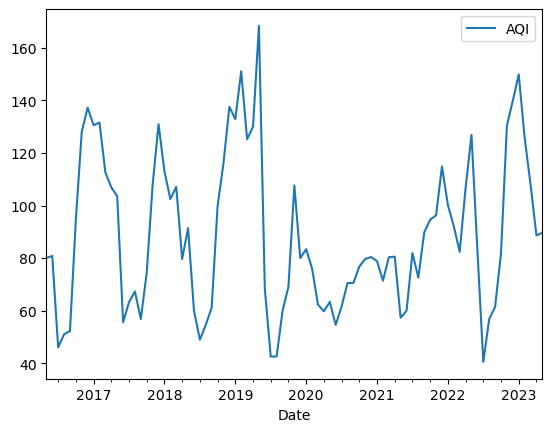

In [257]:
df1.plot()

Test for Stationarity

In [156]:
from statsmodels.tsa.stattools import adfuller

In [258]:
test_result=adfuller(df1['AQI'])

In [259]:
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(q):
    result=adfuller(q)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [260]:
adfuller_test(df1['AQI'])

ADF Test Statistic : -5.1911346676349615
p-value : 9.165981582700053e-06
#Lags Used : 3
Number of Observations Used : 81
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [162]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

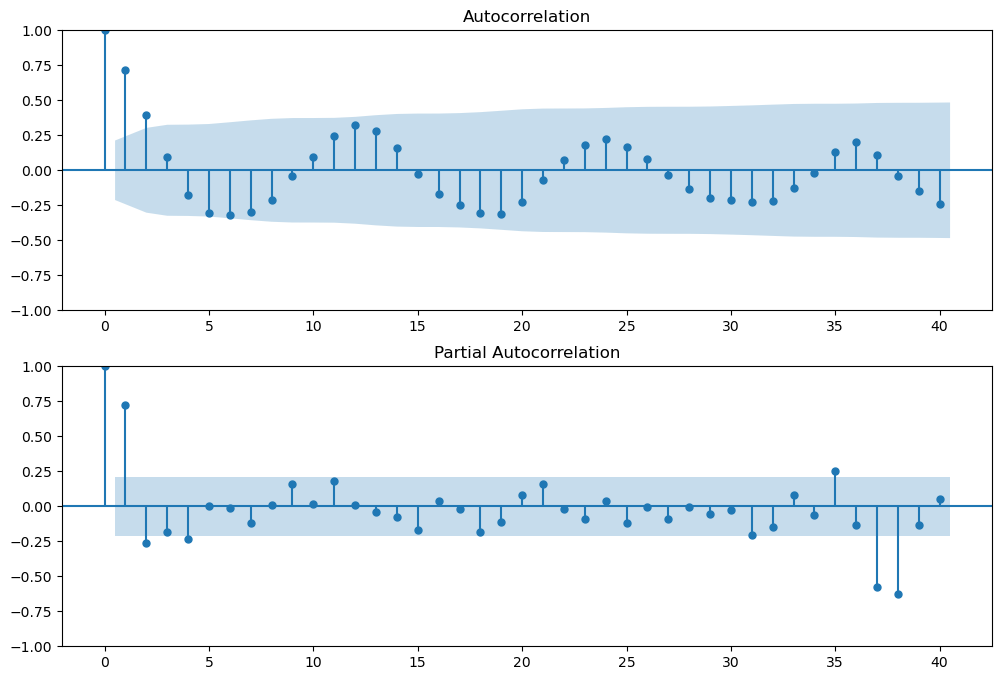

In [261]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['AQI'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['AQI'],lags=40,ax=ax2)

In [164]:
from statsmodels.tsa.arima_model import ARIMA

In [165]:
import statsmodels.api as sm

In [262]:
from pmdarima import auto_arima
# ignoring harmless warnings
import warnings
warnings.filterwarnings('ignore')
stepwise_fit = auto_arima(df1['AQI'],trace=True,suppress_warings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=756.806, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=820.544, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=761.848, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=773.859, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1014.698, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=761.440, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=755.334, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=759.983, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=758.545, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=757.009, Time=0.22 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=758.155, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=777.326, Time=0.08 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 1.685 seconds


In [263]:
model4=sm.tsa.arima.ARIMA(df1['AQI'],order=(2,0,1))
model4=model4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    AQI   No. Observations:                   85
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -372.667
Date:                Fri, 03 Nov 2023   AIC                            755.334
Time:                        22:34:28   BIC                            767.547
Sample:                    05-31-2016   HQIC                           760.246
                         - 05-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.6014      4.485     19.754      0.000      79.810      97.392
ar.L1          1.4820      0.230      6.443      0.000       1.031       1.933
ar.L2         -0.6794      0.164     -4.154      0.000      -1.000      -0.359
ma.L1         -0.6566      0.229     -2.862      0.004      -1.106      -0.207
sigma2       371.8897     48.279      7.703      0.000     277.264     466.515
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                11.45
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.23
Prob(H) (two-sided):                  0.89   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Make prdiction

<Axes: xlabel='Date'>

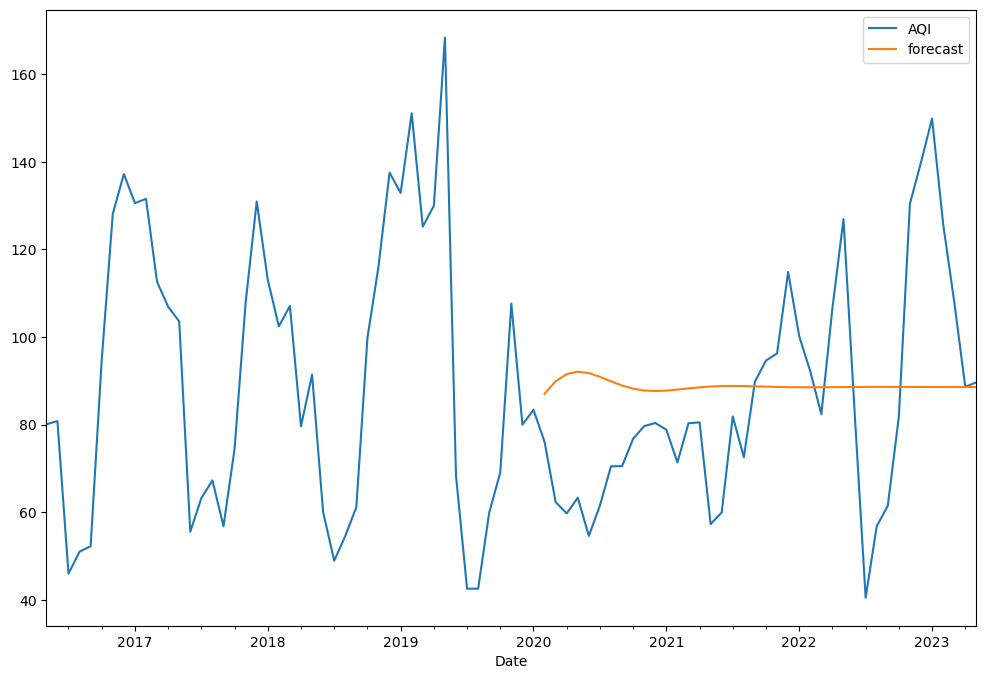

In [264]:
df1['forecast']=model4.predict(start=45,end=85,dynamic=True)
df1[['AQI','forecast']].plot(figsize=(12,8))

In [275]:
model5=sm.tsa.statespace.SARIMAX(df1['AQI'],order=(2,0,1),seasonal_order=(1,1,1,12))
results=model5.fit()

<Axes: xlabel='Date'>

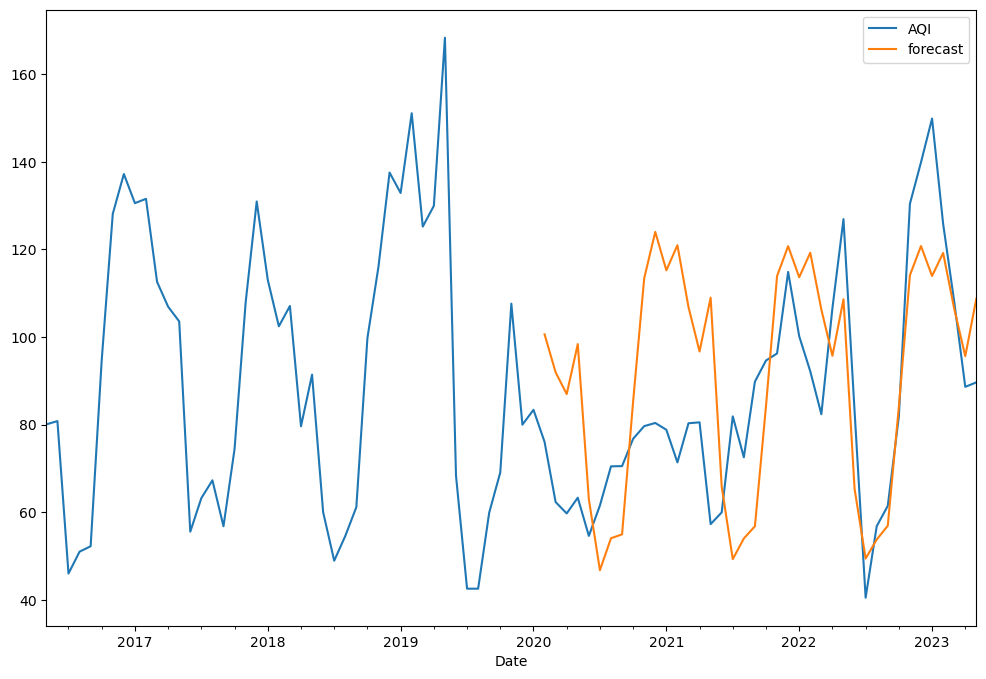

In [276]:
df1['forecast']=results.predict(start=45,end=85,dynamic=True)
df1[['AQI','forecast']].plot(figsize=(12,8))

Future Data Prediction

In [277]:
from dateutil.relativedelta import relativedelta
last_date = df1.index[-1]
last_date = pd.to_datetime(last_date)
future_dates = [last_date + relativedelta(months=x) for x in range(1, 121)]


In [278]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df1.columns)

In [280]:
future_datest_df.tail()

,AQI,forecast
2033-01-31,NaN,NaN
2033-02-28,NaN,NaN
2033-03-31,NaN,NaN
2033-04-30,NaN,NaN
2033-05-31,NaN,NaN


In [281]:
future_df=pd.concat([df1,future_datest_df])

<Axes: >

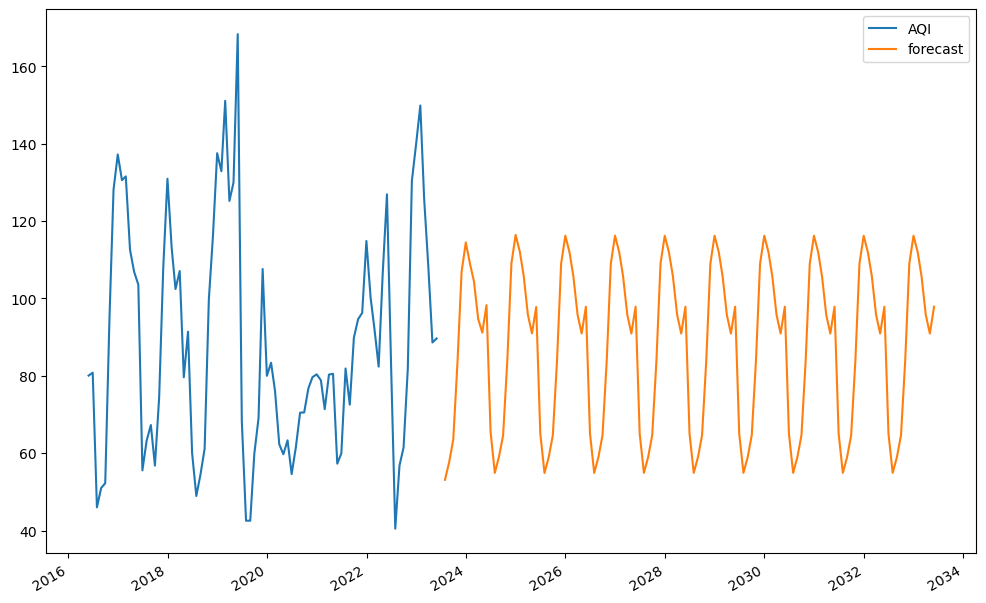

In [282]:
future_df['forecast'] = results.predict(start = 85, end = 212, dynamic= True)  
future_df[['AQI', 'forecast']].plot(figsize=(12, 8)) 